# Episode 04: Proof of concepts

TODO

**Goals for this episode:**
- Try to solve the puzzle with the board defined in Episode 01
- List potential strategies or heuristics

Now we have a board, we can test some ways to solve the puzzle.

Lets's say that the solution is known.

I can ilplement a trial and error process.

# 1. Mimic manual process

## 1.1. Manually solve 2x2

In [3]:
from episode01 import clues2x2, BoardMark, Board

In [41]:
board2x2 = Board(clues2x2)
board2x2.prettyprint()

cols: 2 1
rows:
1
2
[['.' '.']
 ['.' '.']]


In [6]:
print(clues2x2)

{'rows': [1, 2], 'cols': [2, 1]}


In [42]:
# because clues2x2['rows'][1] is 2 and width is 2, all cells of row 1 are black
board2x2.states[1,:] = BoardMark.BLACK.value
# because clues2x2['cols'][0] is 2 and height is 2, all cells of col 0 are black
board2x2.states[:,0] = BoardMark.BLACK.value
board2x2.prettyprint()

cols: 2 1
rows:
1
2
[['o' '.']
 ['o' 'o']]


In [43]:
# has there is already 1 black on the row and col, top right cell is a filler
board2x2.states[0,1] = BoardMark.FILLER.value
board2x2.prettyprint()

cols: 2 1
rows:
1
2
[['o' 'x']
 ['o' 'o']]


Voila!

Thus board is overly simple. Lat's try the 5 by 5 with splits.

## 1.2. Manually solve 5x5 split

In [11]:
from episode01 import clues5x5s, BoardMark, Board

In [12]:
board5x5s = Board(clues5x5s)
board5x5s.prettyprint()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']]


In [13]:
print(clues5x5s)

{'rows': [1, 3, [1, 1], 3, 5], 'cols': [1, 4, [2, 2], 4, 1]}


In [15]:
# because clues5x5s['rows'][4] is 5 and width is 5, all cells of row 4 are black
board5x5s.states[4,:] = BoardMark.BLACK.value
board5x5s.prettyprint()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['o' 'o' 'o' 'o' 'o']]


In [16]:
# because clues5x5s['cols'][2] is [2,2] and height is 5,
# there must be a filler in row 2 and other cells are black
board5x5s.states[:,2] = BoardMark.BLACK.value
board5x5s.states[2,2] = BoardMark.FILLER.value
board5x5s.prettyprint()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' '.' 'o' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['.' '.' 'x' '.' '.']
 ['.' '.' 'o' '.' '.']
 ['o' 'o' 'o' 'o' 'o']]


In [17]:
# because clues5x5s['cols'][1] is 4 and there is a black in row 4
# the contiguous block of black cells must span from row 1 to row 4
# same for clues5x5s['cols'][3]
board5x5s.states[:,1] = BoardMark.BLACK.value
board5x5s.states[:,3] = BoardMark.BLACK.value
board5x5s.states[0,1] = BoardMark.FILLER.value
board5x5s.states[0,3] = BoardMark.FILLER.value
board5x5s.prettyprint()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' 'x' 'o' 'x' '.']
 ['.' 'o' 'o' 'o' '.']
 ['.' 'o' 'x' 'o' '.']
 ['.' 'o' 'o' 'o' '.']
 ['o' 'o' 'o' 'o' 'o']]


In [19]:
# because clues5x5s['rows'][1] is 3 and 3 black are placed on the row
# first and lasr cells mustrt be fillers
# same for clues5x5s['rows'][4]
board5x5s.states[1,0] = BoardMark.FILLER.value
board5x5s.states[1,4] = BoardMark.FILLER.value
board5x5s.states[3,0] = BoardMark.FILLER.value
board5x5s.states[3,4] = BoardMark.FILLER.value
board5x5s.prettyprint()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['.' 'x' 'o' 'x' '.']
 ['x' 'o' 'o' 'o' 'x']
 ['.' 'o' 'x' 'o' '.']
 ['x' 'o' 'o' 'o' 'x']
 ['o' 'o' 'o' 'o' 'o']]


In [21]:
# as every black has been placed remaining cells are fillers
board5x5s.states[0,0] = BoardMark.FILLER.value
board5x5s.states[0,4] = BoardMark.FILLER.value
board5x5s.states[2,0] = BoardMark.FILLER.value
board5x5s.states[2,4] = BoardMark.FILLER.value
board5x5s.prettyprint()

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'x' 'x']
 ['x' 'o' 'o' 'o' 'x']
 ['x' 'o' 'x' 'o' 'x']
 ['x' 'o' 'o' 'o' 'x']
 ['o' 'o' 'o' 'o' 'o']]


Voila

## 1.3 . Where the difficulty comes from ?

- large blocls are easier to place, especially the ones that span over all the width or height
- borders are useful as once a black is placed at a borders all the block of contiguous cells can be placed
- small blocks required a lot of guessing
- split are tricky to manage. First they cause blocks to be smaller. Second, they require to guess even more, you have to make a guess for each block
- an exception is when the filler between blocks is exactly one and all other cells are black. As exemple think of [2,2] over 5


## 1.4. Wrap up

You may implement a series of rules, to mimic this process. But think of the number of rules and the number of tests you may have to implement to feature out which rule applies when.

Well, it is tedious, tricky to implement. And not funny!

I will not implement it. However trying to solve the problem manually help understanding the internals of the problem and what works in a robot.

When a human solves the board, doing tons of computations for each cell is boring. Human tends to rely on more visual clues like proximity, overall shape and symetry. Most of this information is not provided by the clues but our human brain knows that the puzzle boils down to an image and there must be some logic in this image. Nonogram are not supposed to be random scattered plots. 

This reasoning is far beyond what the numeric algorithm can do. 

On the other hand, nonograms are small and computations for a 15x15 matrix are cheap and fast. The problem space (the number of possible options) is reasonably small. From a more general perspective,  putting some rules in the robot may be more efficient than bare computation if rules are carefully chosen bedcause it reduces the problem space.

# 2. Try-and-error process

Having an idea from scratch is difficult.

The contract with the platyer for Nonograms is that they always have 1 solution. Let's say we know that there is a solution. We can try different values for each cell until the board is solved.

Even if this process is probably not what we want, it will help undestand what we need to solve the puzzle. 

In addition, it make sense in AI. Some algorithms, especially in Reinforcement Learning, work by learning from try-and-error process. They are given the goal to keep errors to a minimulm.

In [44]:
# save solutions to numpy arrays
solution2x2 = board2x2.states.copy()
solution5x5s = board5x5s.states.copy()

What could be the try-and-error process ?

For each cell, I know that it could be black or filler. 

We need some game engine to decide whether the action is valid or not according to be solution it knows already. 

## 2.1. Game engine

In [33]:
class GameEngine:
    def __init__(self, some_clues, a_solution):
        self.clues = some_clues
        self.solution = a_solution
        
    def is_action_valid(self, row, col, mark):
        return self.solution[row, col] == mark.value

In [45]:
solution2x2

array([[1, 0],
       [1, 1]])

In [46]:
engine = GameEngine(clues2x2, solution2x2)
engine.is_action_valid(1,1, BoardMark.BLACK)

True

In [47]:
engine.is_action_valid(0,1, BoardMark.BLACK)

False

Now, let's loop over the problem space

## 2.2. Experiments

In [ ]:
from episode01 import clues2x2, BoardMark, Board

In [52]:
board2x2 = Board(clues2x2)
error_count = 0
for row in range(board2x2.height):
    for col in range(board2x2.width):
        if engine.is_action_valid(row, col, BoardMark.BLACK):
            board2x2.mark(row, col, BoardMark.BLACK)
        else: 
            error_count += 1
            board2x2.mark(row, col, BoardMark.FILLER)

board2x2.prettyprint()
print(f"error_count:{error_count}")

cols: 2 1
rows:
1
2
[['o' 'x']
 ['o' 'o']]
error_count:1


Voila!

I agree that this algorithm is pretty dump. The percentage of errors goes up very rapidly and exceed what the game will accept (usually 3 errors). On the 5x5 board it took 11 errors to solve 25 cells.

In [54]:
engine = GameEngine(clues5x5s, solution5x5s)
board5x5s = Board(clues5x5s)
error_count = 0
for row in range(board5x5s.height):
    for col in range(board5x5s.width):
        if engine.is_action_valid(row, col, BoardMark.BLACK):
            board5x5s.mark(row, col, BoardMark.BLACK)
        else: 
            error_count += 1
            board5x5s.mark(row, col, BoardMark.FILLER)

board5x5s.prettyprint()
print(f"error_count:{error_count}")

cols: 1 4 [2, 2] 4 1
rows:
1
3
[1, 1]
3
5
[['x' 'x' 'o' 'x' 'x']
 ['x' 'o' 'o' 'o' 'x']
 ['x' 'o' 'x' 'o' 'x']
 ['x' 'o' 'o' 'o' 'x']
 ['o' 'o' 'o' 'o' 'o']]
error_count:11


# 2.3  Wrap up

What works:
- it is really simple to design and implement
- no computation, no headache with split blocks

Limitation:
- requires that the solution is known beforehand
- roughly 50% error rate. It depends on the proportion of blacks and fillers,  and whether blacks or fillers are checked for validity

# 3. Brute Force

The idea behind brute force is to generate all possible options and then check which one is vaid.

Unlike try-and-error the validation will take place on the whole board. We do not need to know the solution beforehand. The engine can compute the clues from the board and check whether the board holds or breaks the clues.

## 3.1. Experiment on 2x2

The first steo is to list all possible options for the oard.

The board is a list of 0 and 1. From the clues we know the number of black cells. It is the sum of all clues.

All possible boards are permutations of this black cells over the cells of the board. If I have [1,0] all permutations are [1,0] and [0,1]

In [133]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [145]:
black_count = sum(clues2x2['rows'])
cells_count = len(clues2x2['rows']) * len(clues2x2['cols'])

In [169]:
from itertools import repeat, chain, tee
# 3 blacks
black_iterator = repeat(BoardMark.BLACK.value, black_count) 
# 1 filler
filler_iterator = repeat(BoardMark.FILLER.value, cells_count - black_count) 
# chain concatenate both iterators
# tee -is used for debugging, it duplicates the iterator which can be consummed only once
initial_states_iterator, debug_iterator = tee(chain(black_iterator, filler_iterator))
# show the value for debugging
list(debug_iterator)

[1, 1, 1, 0]

In [170]:
from itertools import permutations
# generate permutations 
permutations_iterator, debug_iterator = tee(permutations(initial_states_iterator))
list(debug_iterator)
# there are 16 because permutation switch elements of the list and not values
# it does not take care that 1 occurs many times

[(1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1)]

In [171]:
# create the game engine
engine = GameEngine(clues2x2, solution2x2)
engine.solution.tolist()

[[1, 0], [1, 1]]

In [172]:
# reshape flat the list into a 1D array
flat_solution = engine.solution.reshape(cells_count).tolist()
flat_solution

[1, 0, 1, 1]

In [173]:
import numpy as np

board2x2 = Board(clues2x2)
# set avoids duplicates generated by permutations
for o in set(permutations_iterator):
    print(f"option:{o}")
    # select valid options
    if flat_solution == list(o): # option is a tuple () not a lust
        print(f"valid:{o}")
        board2x2.states.flat[:] = o

option:(1, 1, 0, 1)
option:(1, 1, 1, 0)
option:(0, 1, 1, 1)
option:(1, 0, 1, 1)
valid:(1, 0, 1, 1)


In [174]:
board2x2.prettyprint()

cols: 2 1
rows:
1
2
[['o' 'x']
 ['o' 'o']]


## 3.2. Experiment on 2x2 - Alternative implementation

Another way of analysing this problem is to get all possible indexs of black cells instead of all possible boards.

Let's say there is a jar with numbers from 0 to 3. These are possible positions of a cell in the board. I want to draw 3 numbers from the jar. This is named combination.

In [177]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [178]:
black_count = sum(clues2x2['rows'])
cells_count = len(clues2x2['rows']) * len(clues2x2['cols'])

In [191]:
from itertools import combinations, tee
# want to get 3 positions in a range 0 - 4 where 4 is the number of cells
# we want each position to be unique thus no replacement
combinations_iterator, debug_iterator = tee(combinations(range(cells_count), black_count))
list(debug_iterator)

[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

In [182]:
# create the game engine
engine = GameEngine(clues2x2, solution2x2)
engine.solution.tolist()

[[1, 0], [1, 1]]

In [183]:
# reshape flat the list into a 1D array
flat_solution = engine.solution.reshape(cells_count).tolist()
flat_solution

[1, 0, 1, 1]

In [192]:
import numpy as np

board2x2 = Board(clues2x2)
for option in combinations_iterator:
    print(f"option:{option}")
    # compute the board state
    # put black at each position in combinations_iterator and fillers elsewhere
    states = np.full(cells_count, BoardMark.FILLER.value, dtype=int)
    # put black at each position in combinations_iterator and fillers elsewhere
    for pos in option:
        states.flat[pos] = BoardMark.BLACK.value
    
    # select valid options
    if flat_solution == states.tolist(): 
        print(f"valid:{states}")
        # batch update the board flattent to 1D
        board2x2.states.flat[:] = states

option:(0, 1, 2)
option:(0, 1, 3)
option:(0, 2, 3)
valid:[1 0 1 1]
option:(1, 2, 3)


In [193]:
board2x2.prettyprint()

cols: 2 1
rows:
1
2
[['o' 'x']
 ['o' 'o']]


## 3.3. Wrap up

What works:
- it is simple to design and implement
- no computation, no headache with split blocks

Limitation:
- number of options  increase rapidly with the size of the board. 

In addition all these options will have to be checked for validity. We used known solutions here  because they are available but in a real use case we would evaluate whether the option match the clues for each option.

The number of options increases lower with implementation 2 because the problem space is smaller. It is the number of blacks instead of the number of cells (blacks are usually around 50% of cells). However it increases rapidly.

In [ ]:
from itertools import combinations

In [197]:
%time
from itertools import combinations
black_count = 4
cells_count = 9
combinations_iterator = combinations(range(cells_count), black_count)
len(list(combinations_iterator))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


126

In [198]:
%time
black_count = 7
cells_count = 16
combinations_iterator = combinations(range(cells_count), black_count)
len(list(combinations_iterator))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


11440

In [199]:
%time
black_count = 14
cells_count = 25
combinations_iterator = combinations(range(cells_count), black_count)
len(list(combinations_iterator))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


4457400

# 4. Programming with constraints

TODO

# 5. Dynamic programming

TODO

# 6. Probabilistic approach

TODO

# 7. Genetic algorithm

"genetic algorithm (GA) is a metaheuristic inspired by the process of natural selection that belongs to the larger class of evolutionary algorithms (EA). Genetic algorithms are commonly used to generate high-quality solutions to optimization and search problems by relying on biologically inspired operators such as mutation, crossover and selection" - Wikipedia

TODO how could it work here, explain a little bit the selection process

https://pypi.org/project/geneticalgorithm/
    
geneticalgorithm is a Python library distributed on Pypi for implementing standard and elitist genetic-algorithm (GA). This package solves continuous, combinatorial and mixed optimization problems with continuous, discrete, and mixed variables. It provides an easy implementation of genetic-algorithm (GA) in Python.

We will use geneticalgorithm for this demonstration because it is more simple and fit this case. Plase not that there is also PyGAD

https://pygad.readthedocs.io/en/latest/

PyGAD is an open-source Python library for building the genetic algorithm and optimizing machine learning algorithms. It works with Keras and PyTorch.

PyGAD supports different types of crossover, mutation, and parent selection operators. PyGAD allows different types of problems to be optimized using the genetic algorithm by customizing the fitness function.

## 7.1. Example

In [228]:
! pip install geneticalgorithm

     |████████████████████████████████| 44 kB 5.9 MB/s eta 0:00:011
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15095 sha256=b9ffca2c555b489742e2ca7c60f8b6e3de97d8e2d9f5863da9970ebc27d9e4a8
  Stored in directory: /Users/cfalguiere/Library/Caches/pip/wheels/ef/91/3f/17cbea1e83d17cc01bd2d66a0d59e65301bcb2d59f2f6a62ab
Successfully built func-timeout


Assume we want to find a set of X=(x1,x2,x3) that minimizes function f(X)=x1+x2+x3 where X can be any integer number in [0,10].

 The best solution found:                                                                           
 [0. 0. 0.]

 Objective function:
 0.0


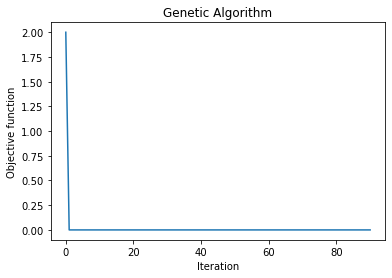

In [229]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return np.sum(X)


varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='int',variable_boundaries=varbound)

model.run()


In a nonogram 2x2 we want to find a set of X=(x1,x2,x3,x4) that minimizes an error function f(X)=x1+x2+x3 where X can be any integer number in [0,1].
The error function compute the deviation from the clues.

## 7.2. Proof of concept on 2x2

In [200]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [ ]:
engine.solution

In [ ]:
black_count = sum(clues2x2['rows'])
cells_count = len(clues2x2['rows']) * len(clues2x2['cols'])

to make it simple we will use the overall sum. The real function should compare col/row sums on X with clues

 The best solution found:                                                                           
 [1. 1. 1. 0.]

 Objective function:
 0.0


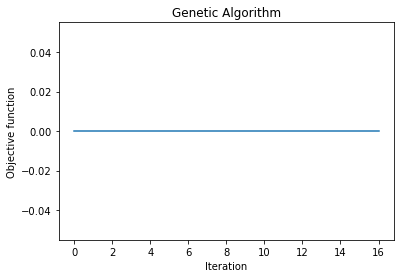

In [259]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return abs(np.sum(X) - black_count)


varbound=np.array([[0,1]]*cells_count)

model=ga(function=f,dimension=cells_count,variable_type='int',variable_boundaries=varbound)

model.run()

In [260]:
solution=model.output_dict
solution

{'variable': array([1., 1., 1., 0.]), 'function': 0.0}

Please note that it found any array with three 1 and one 0. This is caused by the error function being too loose.
In the dict
- variable contains the optimized output
- function is the residual error after the model ran

In [248]:
board2x2 = Board(clues2x2)
board2x2.states.flat[:] = solution['variable'].tolist()
board2x2.prettyprint()

cols: 2 1
rows:
1
2
[['o' 'x']
 ['o' 'o']]


## 7.3. Wrap up

What works:
- it is simple to design and implement
- pretty easy to use
- it works on a numpy which will make it easy to compute rules

Limitation:
- May be overkill for this simple problem


This prrof of concept is 

Computations in the error function may use reshape and np.sum to cimpute sums on X. And then compare each sums to each clue in order to compute the abs error sum element by element. 

In [254]:
states = np.array([1, 0, 1, 1]).reshape(2,2)
states

array([[1, 0],
       [1, 1]])

In [255]:
states.sum(axis=0) # O col

array([2, 1])

In [256]:
states.sum(axis=1) # 1 col

array([1, 2])

# 8. Machine Learning

TODO

# 9. Wrap up

This quick exploration of ways of solving this problem show that we need some additional components :
- a game engine which provides the try-and-error validation and the board validation 
- some operation thate were identified in episode 01: is the board completed, is the board valid
- a puzzle class with some operations to transform the clues and compute black count and cels count
- try-and-error and learning process will require something in between not done and done in order to improve on rewards:   number of cells completed/undefined, number of errors, number of valid celss
